In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset with dtype specification for columns with mixed types
dtype_specification = {'Precip': str, 'STA': str, 'Date': str, 'WindGustSpd': str, 'Snowfall': str, 'PoorWeather': str, 'PRCP': str, 'DR': str, 'SPD': str, 'SNF': str, 'SND': str, 'FT': str, 'FB': str, 'FTI': str, 'ITH': str, 'PGT': str, 'TSHDSBRSGF': str, 'SD3': str, 'RHX': str, 'RHN': str, 'RVG': str, 'WTE': str}
Weather = pd.read_csv('Summary of Weather.csv', dtype=dtype_specification)

# Copy the dataset to a new DataFrame
climate = pd.DataFrame(Weather)

# Drop unnecessary columns
to_drop = ['Precip', 'STA', 'Date', 'WindGustSpd', 'Snowfall', 'PoorWeather', 'PRCP', 'DR', 'SPD', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']
climate.drop(to_drop, inplace=True, axis=1)

# Drop rows with missing values
climate.dropna(subset=['MaxTemp', 'MinTemp', 'MeanTemp', 'MAX', 'MIN', 'MEA'], inplace=True)


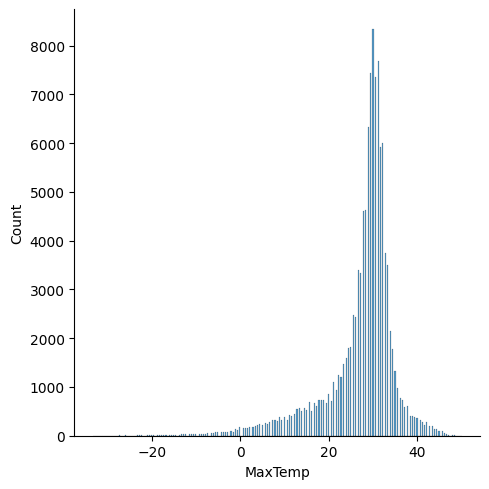

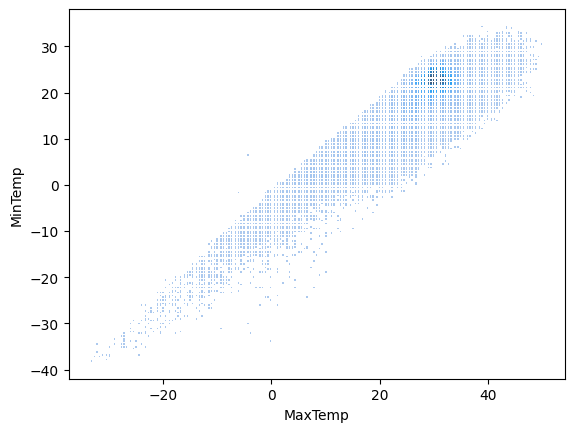

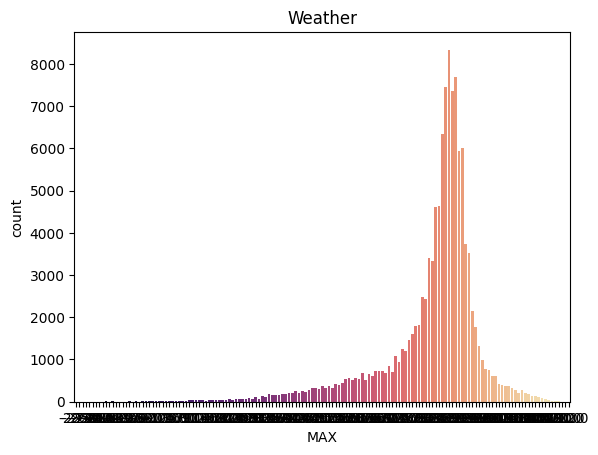

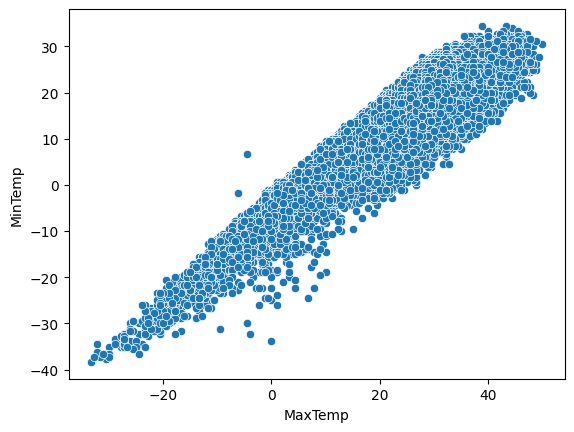

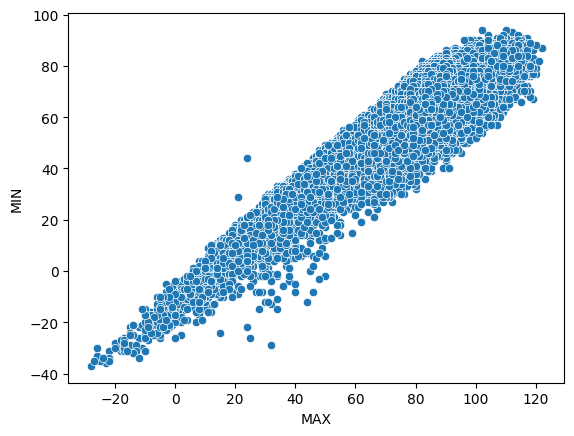

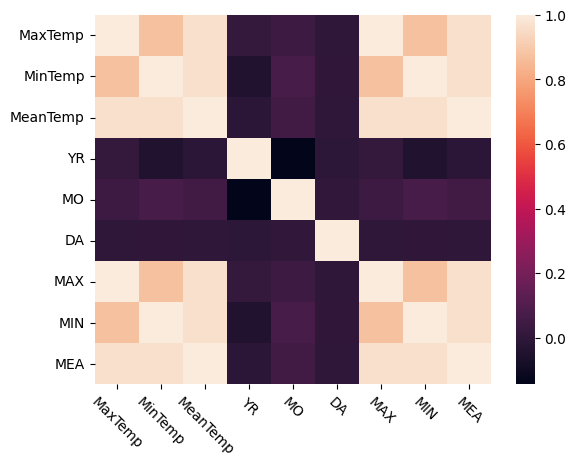

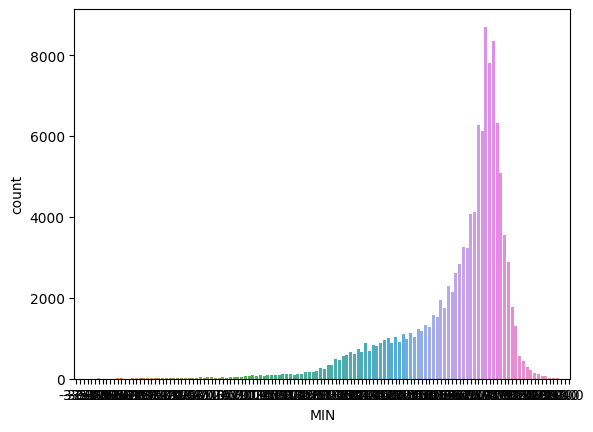

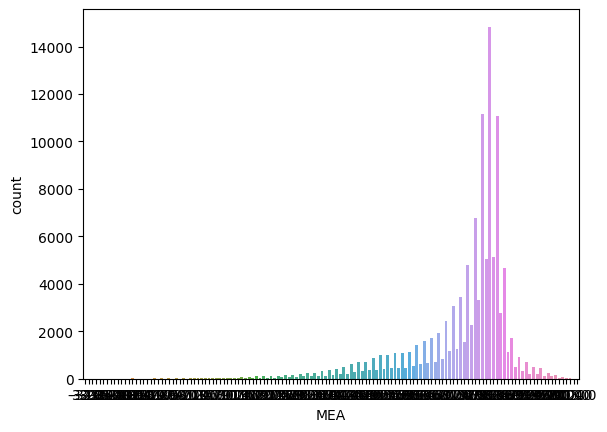

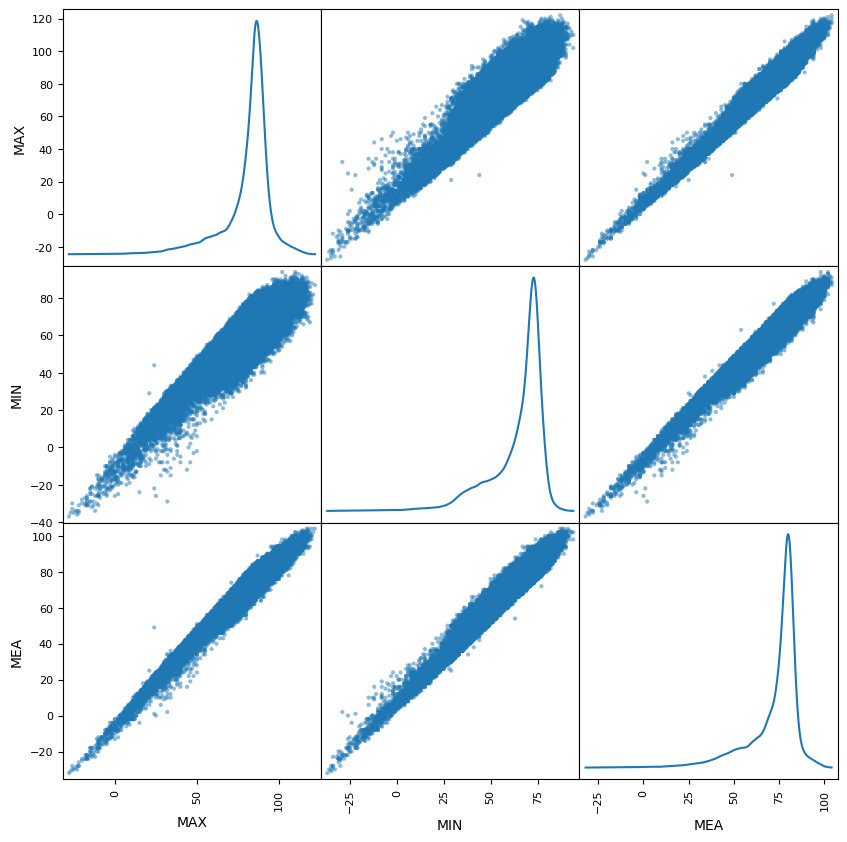

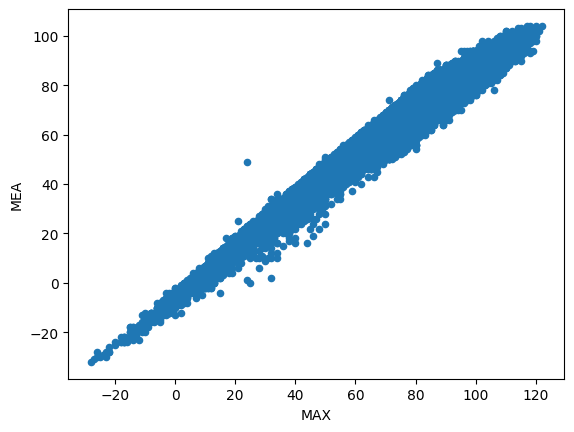

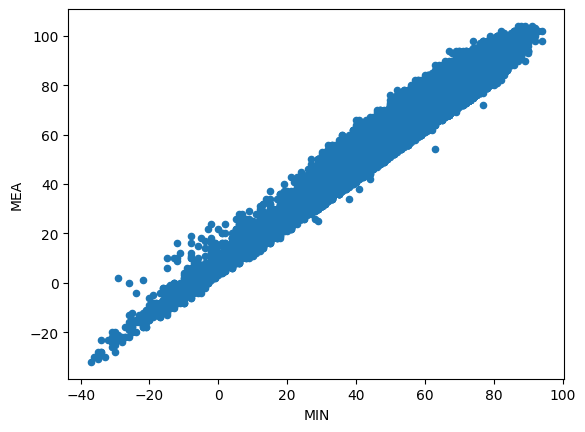

In [13]:
# Visualize the data using displot
sns.displot(climate['MaxTemp'], kde=False)
plt.show()

# Use histplot without palette
sns.histplot(x='MaxTemp', y='MinTemp', data=climate)
plt.show()

# Use countplot for countplot
sns.countplot(x='MAX', data=climate, palette='magma')
plt.title('Weather')
plt.show()

# Use scatterplot for pointplot
sns.scatterplot(x='MaxTemp', y='MinTemp', data=climate)
plt.show()

# Use scatterplot for regplot
sns.scatterplot(x='MAX', y='MIN', data=climate)
plt.show()

# Use heatmap for correlation plot
sns.heatmap(climate.corr())
plt.xticks(rotation=-45)
plt.show()

# Use countplot for countplot
sns.countplot(x='MIN', data=climate)
plt.show()

# Use countplot for countplot
sns.countplot(x='MEA', data=climate)
plt.show()

# Use scatter_matrix for scatter plot
cols = ['MAX', 'MIN', 'MEA']
pd.plotting.scatter_matrix(climate[cols], figsize=(10, 10), diagonal='kde')
plt.show()

# Use scatterplot for scatter plot
climate.plot.scatter(x='MAX', y='MEA')
plt.show()

# Use scatterplot for scatter plot
climate.plot.scatter(x='MIN', y='MEA')
plt.show()


In [14]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test
y = climate['MaxTemp']
X = climate[['MinTemp']]  # Adjust the feature column(s) as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Importing linear regression model from sklearn to train the simple regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_linear = regressor.predict(X_test)

# Evaluate Linear Regression model
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression RMSE Score: {:.2f}".format(linear_rmse))
print("Linear Regression R2 Score: {:.2f}".format(linear_r2))

Linear Regression RMSE Score: 4.04
Linear Regression R2 Score: 0.76


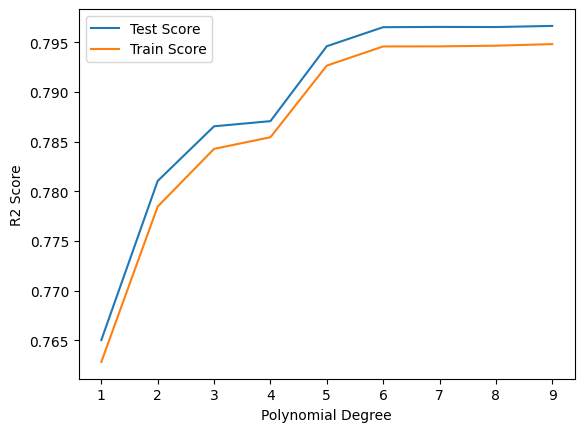

Best Polynomial Degree: 9


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

test_score = []
train_score = []

# Try different polynomial degrees
for d in range(1, 10):
    poly_cnv = PolynomialFeatures(degree=d, include_bias=False)
    poly_x = poly_cnv.fit_transform(X)
    train_x, test_x, train_y, test_y = train_test_split(poly_x, y, test_size=0.25, random_state=50)
    regr = LinearRegression()
    regr.fit(train_x, train_y)
    yhat = regr.predict(test_x)
    yhat_train = regr.predict(train_x)
    r2 = r2_score(test_y, yhat)
    r2_train = r2_score(train_y, yhat_train)
    test_score.append(r2)
    train_score.append(r2_train)

# Find the best degree with comparing scores
best_degree = np.argmax(test_score) + 1

plt.plot(range(1, 10), test_score, label='Test Score')
plt.plot(range(1, 10), train_score, label='Train Score')
plt.xlabel("Polynomial Degree")
plt.ylabel("R2 Score")
plt.legend()
plt.show()

print("Best Polynomial Degree:", best_degree)

In [17]:
# Create the final model using the best degree
final_cnv = PolynomialFeatures(degree=best_degree, include_bias=False)
poly_x = final_cnv.fit_transform(X)
train_x, test_x, train_y, test_y = train_test_split(poly_x, y, test_size=0.25, random_state=50)
regr = LinearRegression()
regr.fit(train_x, train_y)
y_pred_poly = regr.predict(test_x)  # Predict using the polynomial regression model

# Evaluate Polynomial Regression model
poly_rmse = np.sqrt(mean_squared_error(test_y, y_pred_poly))
poly_r2 = r2_score(test_y, y_pred_poly)

print("Polynomial Regression RMSE Score: {:.2f}".format(poly_rmse))
print("Polynomial Regression R2 Score: {:.2f}".format(poly_r2))

Polynomial Regression RMSE Score: 3.73
Polynomial Regression R2 Score: 0.80


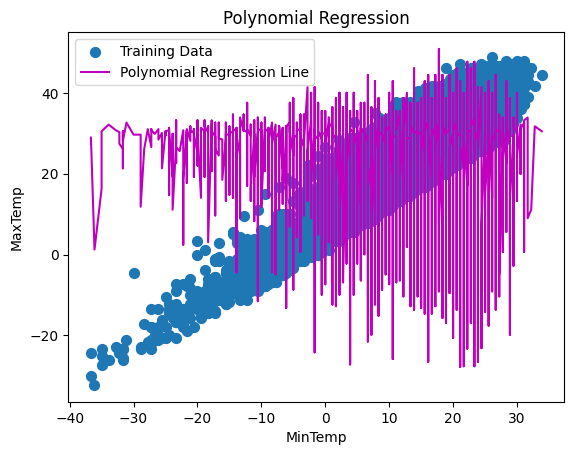

In [18]:
# Sort the data for plotting
sort_indices = np.argsort(X_train.values.flatten())
max_index = len(X_train) if len(X_train) < len(y_pred_poly) else len(y_pred_poly)
sort_indices = sort_indices[sort_indices < max_index]

X_train_sorted = X_train.values.flatten()[sort_indices]
y_pred_poly_sorted = y_pred_poly[sort_indices]

# Plot the data and the polynomial regression line
plt.scatter(X_train_sorted, y_train.iloc[sort_indices], s=50, label='Training Data')
plt.plot(X_train_sorted, y_pred_poly_sorted, color='m', label='Polynomial Regression Line')
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

In [19]:
# Random Forest Regression

# Importing RandomForestRegressor from sklearn.ensemble for training the random forest model
from sklearn.ensemble import RandomForestRegressor

# Define the number of estimators (you can adjust it as per your requirement)
n_estimators = 5
rf_reg = RandomForestRegressor(n_estimators=n_estimators, random_state=0)

# Fit the random forest model on the training data
rf_reg.fit(X_train, y_train)

# Predict on training data using the trained random forest model
rf_predict = rf_reg.predict(X_train)

# Evaluate the random forest model using RMSE and R2 score on training data
rmse_rf = np.sqrt(mean_squared_error(y_train, rf_predict))
r2_rf = r2_score(y_train, rf_predict)
print("Random Forest RMSE Score: {:.2f}".format(rmse_rf))
print("Random Forest R2 Score: {:.2f}".format(r2_rf))

Random Forest RMSE Score: 3.72
Random Forest R2 Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


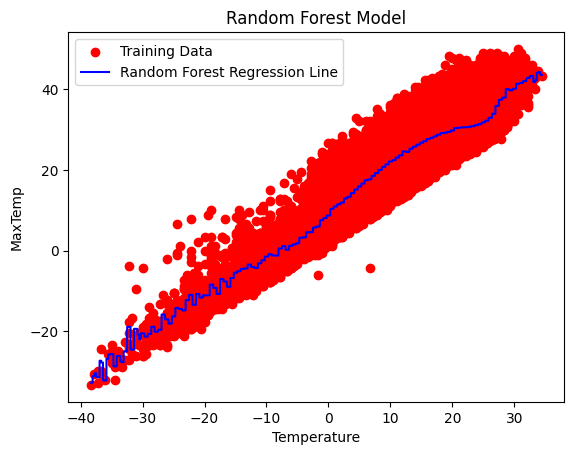

In [20]:
# Plot the original data and the random forest regression line
plt.scatter(X_train, y_train, color="red", label="Training Data")
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01).reshape(-1, 1)
y_pred_rf = rf_reg.predict(X_grid)
plt.plot(X_grid, y_pred_rf, color="blue", label="Random Forest Regression Line")
plt.xlabel("Temperature")
plt.ylabel("MaxTemp")
plt.title("Random Forest Model")
plt.legend()
plt.show()
